
# Old Car Price Prediction 
# Phase 1

Phase 1:- Import dataset in CSV file and Cleaning datasets

In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data_sets = pd.read_csv("train-data.csv")
data_test = pd.read_csv("test-data.csv")

In [3]:
dt =data_test.dropna()

In [4]:
data_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [5]:
df =data_sets.drop(["Unnamed: 0", "New_Price"] , axis=1)
dtf =data_test.drop(["Unnamed: 0", "New_Price"] , axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [7]:
df["Fuel_Type"].value_counts()

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

In [8]:
df["Owner_Type"].value_counts()

Owner_Type
First             4929
Second             968
Third              113
Fourth & Above       9
Name: count, dtype: int64

In [9]:
df["Seats"].value_counts()

Seats
5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: count, dtype: int64

In [10]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [11]:
print(list(np.where(df["Seats"] == 0.0)))

[array([3999], dtype=int64)]


In [12]:
df.iloc[3999]

Name                 Audi A4 3.2 FSI Tiptronic Quattro
Location                                     Hyderabad
Year                                              2012
Kilometers_Driven                               125000
Fuel_Type                                       Petrol
Transmission                                 Automatic
Owner_Type                                       First
Mileage                                      10.5 kmpl
Engine                                         3197 CC
Power                                         null bhp
Seats                                              0.0
Price                                             18.0
Name: 3999, dtype: object

In [13]:
df =df.drop([3999])

In [14]:
df.iloc[3999]

Name                 Ford Figo Diesel EXI
Location                          Kolkata
Year                                 2011
Kilometers_Driven                   37000
Fuel_Type                          Diesel
Transmission                       Manual
Owner_Type                          First
Mileage                         20.0 kmpl
Engine                            1399 CC
Power                           68.05 bhp
Seats                                 5.0
Price                                 1.8
Name: 4000, dtype: object

In [15]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [16]:
df = df.dropna()
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [17]:
df.shape

(5974, 12)

In [18]:
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [19]:
df['Name'].str.split(" ").str[0]

0          Maruti
1         Hyundai
2           Honda
3          Maruti
4            Audi
          ...    
6014       Maruti
6015      Hyundai
6016     Mahindra
6017       Maruti
6018    Chevrolet
Name: Name, Length: 5974, dtype: object

In [20]:
df['Name'].str.split(" ").str[1]

0        Wagon
1        Creta
2         Jazz
3       Ertiga
4           A4
         ...  
6014     Swift
6015     Xcent
6016      Xylo
6017     Wagon
6018      Beat
Name: Name, Length: 5974, dtype: object

In [21]:
 df['Name']= df['Name'].apply(lambda x:x.split(' ')[0]+" "+x.split(' ')[1])
 dtf['Name']= dtf['Name'].apply(lambda x:x.split(' ')[0]+" "+x.split(' ')[1])

In [22]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [23]:
dtf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [24]:
df.shape

(5974, 12)

In [25]:
data_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [26]:
data_test.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [27]:
dt.shape

(182, 13)

In [28]:
dt.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
30,30,Toyota Etios Cross 1.4L VD,Chennai,2014,70000,Diesel,Manual,Second,23.59 kmpl,1364 CC,67.06 bhp,5.0,9.27 Lakh
36,36,Skoda Rapid 1.6 MPI AT Style,Mumbai,2017,13500,Petrol,Automatic,First,14.84 kmpl,1598 CC,103.52 bhp,5.0,14.95 Lakh
39,39,BMW 5 Series 520d Luxury Line,Mumbai,2012,66889,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0,70.43 Lakh
43,43,Skoda Rapid 1.6 MPI Ambition,Jaipur,2018,4000,Petrol,Manual,First,15.41 kmpl,1598 CC,103.52 bhp,5.0,11.89 Lakh


In [29]:
dtf.shape

(1234, 11)

In [30]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


# Phase 2

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kilometers_Driven'}>],
       [<Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

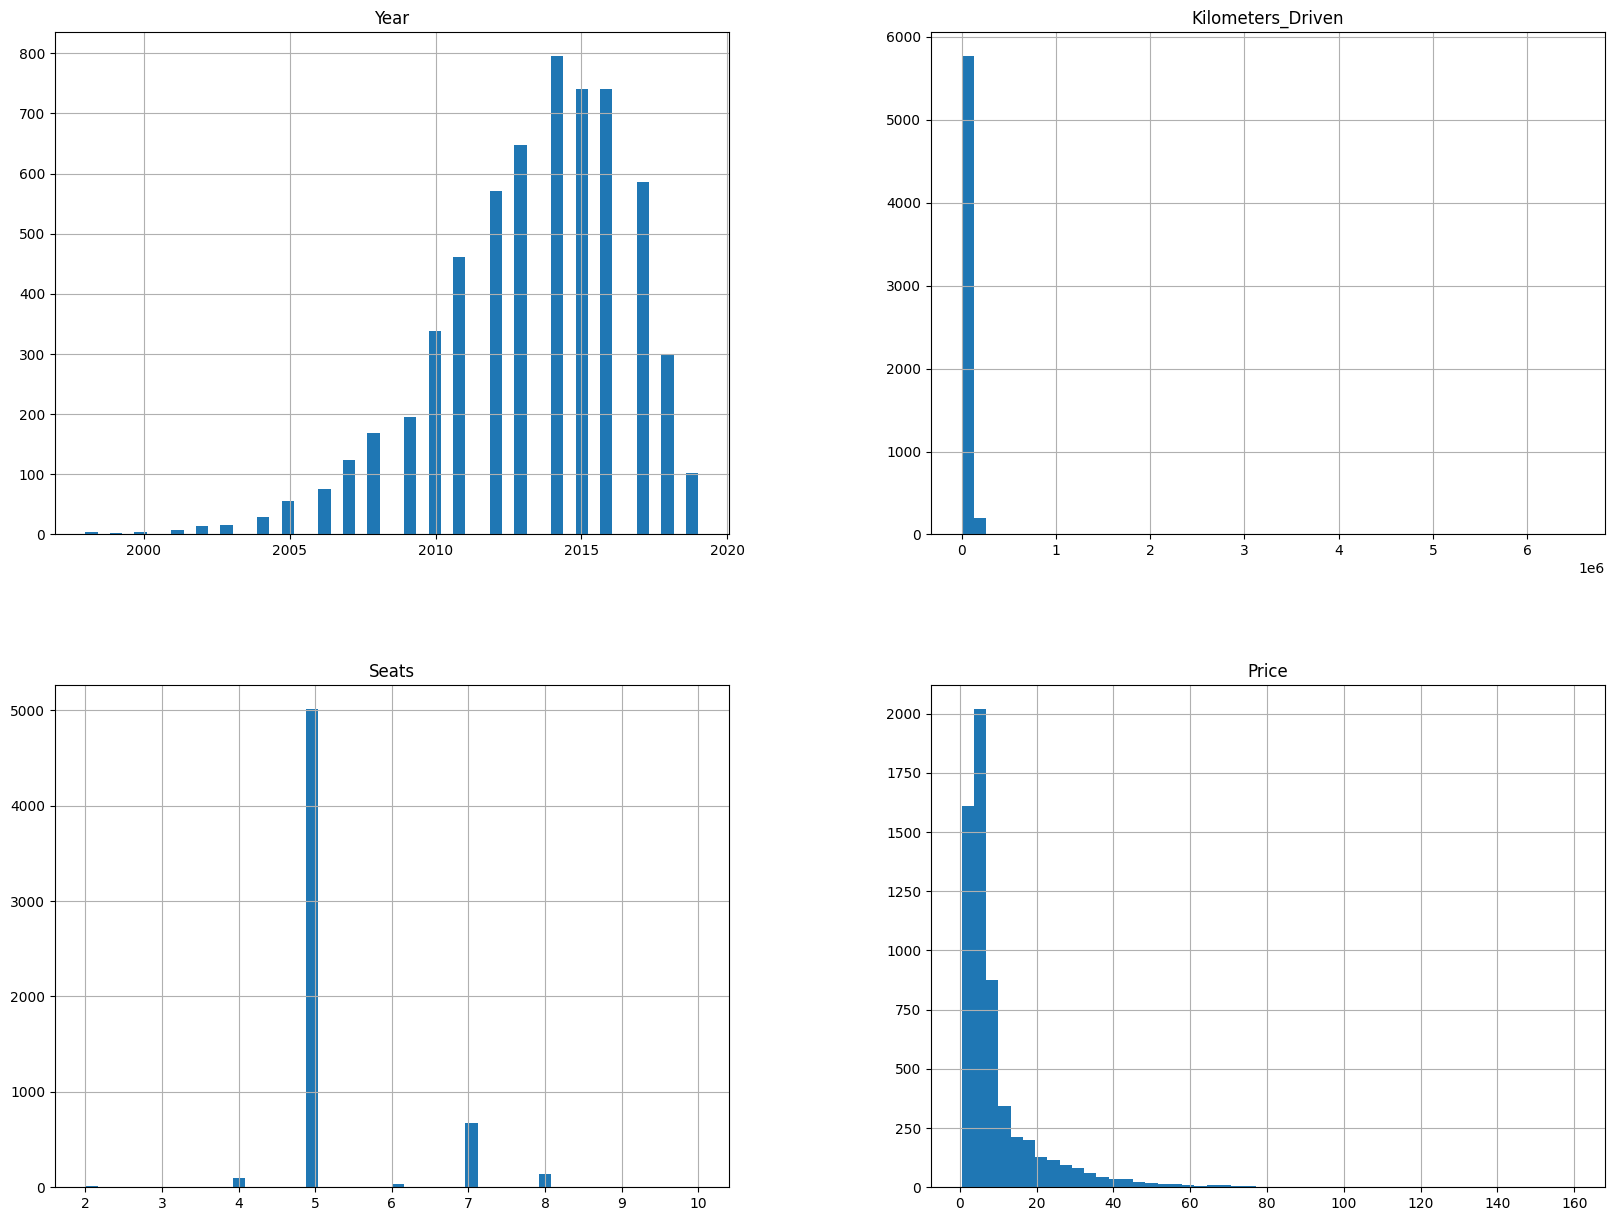

In [31]:
df.hist(bins = 50 , figsize=(20,15))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5974 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5974 non-null   object 
 1   Location           5974 non-null   object 
 2   Year               5974 non-null   int64  
 3   Kilometers_Driven  5974 non-null   int64  
 4   Fuel_Type          5974 non-null   object 
 5   Transmission       5974 non-null   object 
 6   Owner_Type         5974 non-null   object 
 7   Mileage            5974 non-null   object 
 8   Engine             5974 non-null   object 
 9   Power              5974 non-null   object 
 10  Seats              5974 non-null   float64
 11  Price              5974 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.7+ KB


In [33]:
df['Mileage'] = df['Mileage'].str.replace(' kmpl','')
df['Mileage'] = df['Mileage'].str.replace(' km/kg','')
df['Engine'] = df['Engine'].str.replace(' CC','')
df['Power'] = df['Power'].str.replace('null bhp','125')
df['Power'] = df['Power'].str.replace(' bhp','')

dtf['Mileage'] = dtf['Mileage'].str.replace(' kmpl','')
dtf['Mileage'] = dtf['Mileage'].str.replace(' km/kg','')
dtf['Engine'] = dtf['Engine'].str.replace(' CC','')
dtf['Power'] = dtf['Power'].str.replace('null bhp','125')
dtf['Power'] = dtf['Power'].str.replace(' bhp','')

In [34]:
dtf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti Alto,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota Innova,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota Etios,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,125,5.0
4,Hyundai i20,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0


In [35]:
dft = dtf.dropna()

In [36]:
dft.shape

(1223, 11)

In [37]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [38]:
df['Mileage'] = df['Mileage'].astype(float)
df['Engine'] = df['Engine'].astype(float)
df['Power'] = df['Power'].astype(float)


dtf['Mileage'] = dtf['Mileage'].astype(float)
dtf['Engine'] = dtf['Engine'].astype(float)
dtf['Power'] = dtf['Power'].astype(float)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5974 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5974 non-null   object 
 1   Location           5974 non-null   object 
 2   Year               5974 non-null   int64  
 3   Kilometers_Driven  5974 non-null   int64  
 4   Fuel_Type          5974 non-null   object 
 5   Transmission       5974 non-null   object 
 6   Owner_Type         5974 non-null   object 
 7   Mileage            5974 non-null   float64
 8   Engine             5974 non-null   float64
 9   Power              5974 non-null   float64
 10  Seats              5974 non-null   float64
 11  Price              5974 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 606.7+ KB


In [40]:
df1 =df.copy()

In [41]:
df1 = df1.replace("First" , 1)
df1 = df1.replace("Second" , 2)
df1 = df1.replace("Third", 3)
df1 = df1.replace("Fourth & Above" , 4)


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5974 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5974 non-null   object 
 1   Location           5974 non-null   object 
 2   Year               5974 non-null   int64  
 3   Kilometers_Driven  5974 non-null   int64  
 4   Fuel_Type          5974 non-null   object 
 5   Transmission       5974 non-null   object 
 6   Owner_Type         5974 non-null   int64  
 7   Mileage            5974 non-null   float64
 8   Engine             5974 non-null   float64
 9   Power              5974 non-null   float64
 10  Seats              5974 non-null   float64
 11  Price              5974 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 606.7+ KB


In [43]:
df1["Fuel_Type"].value_counts()

Fuel_Type
Diesel    3195
Petrol    2713
CNG         56
LPG         10
Name: count, dtype: int64

In [44]:
df1 = df1.replace("Manual" , 1)
df1 = df1.replace("Automatic" , 2)

In [45]:
df1 = df1.replace("Diesel" ,1)
df1 = df1.replace("Petrol", 2)
df1 = df1.replace("CNG", 3)
df1 = df1.replace("LPG" , 4)

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5974 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5974 non-null   object 
 1   Location           5974 non-null   object 
 2   Year               5974 non-null   int64  
 3   Kilometers_Driven  5974 non-null   int64  
 4   Fuel_Type          5974 non-null   int64  
 5   Transmission       5974 non-null   int64  
 6   Owner_Type         5974 non-null   int64  
 7   Mileage            5974 non-null   float64
 8   Engine             5974 non-null   float64
 9   Power              5974 non-null   float64
 10  Seats              5974 non-null   float64
 11  Price              5974 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 606.7+ KB


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Fuel_Type'}>],
       [<Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Owner_Type'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'Engine'}>,
        <Axes: title={'center': 'Power'}>,
        <Axes: title={'center': 'Seats'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

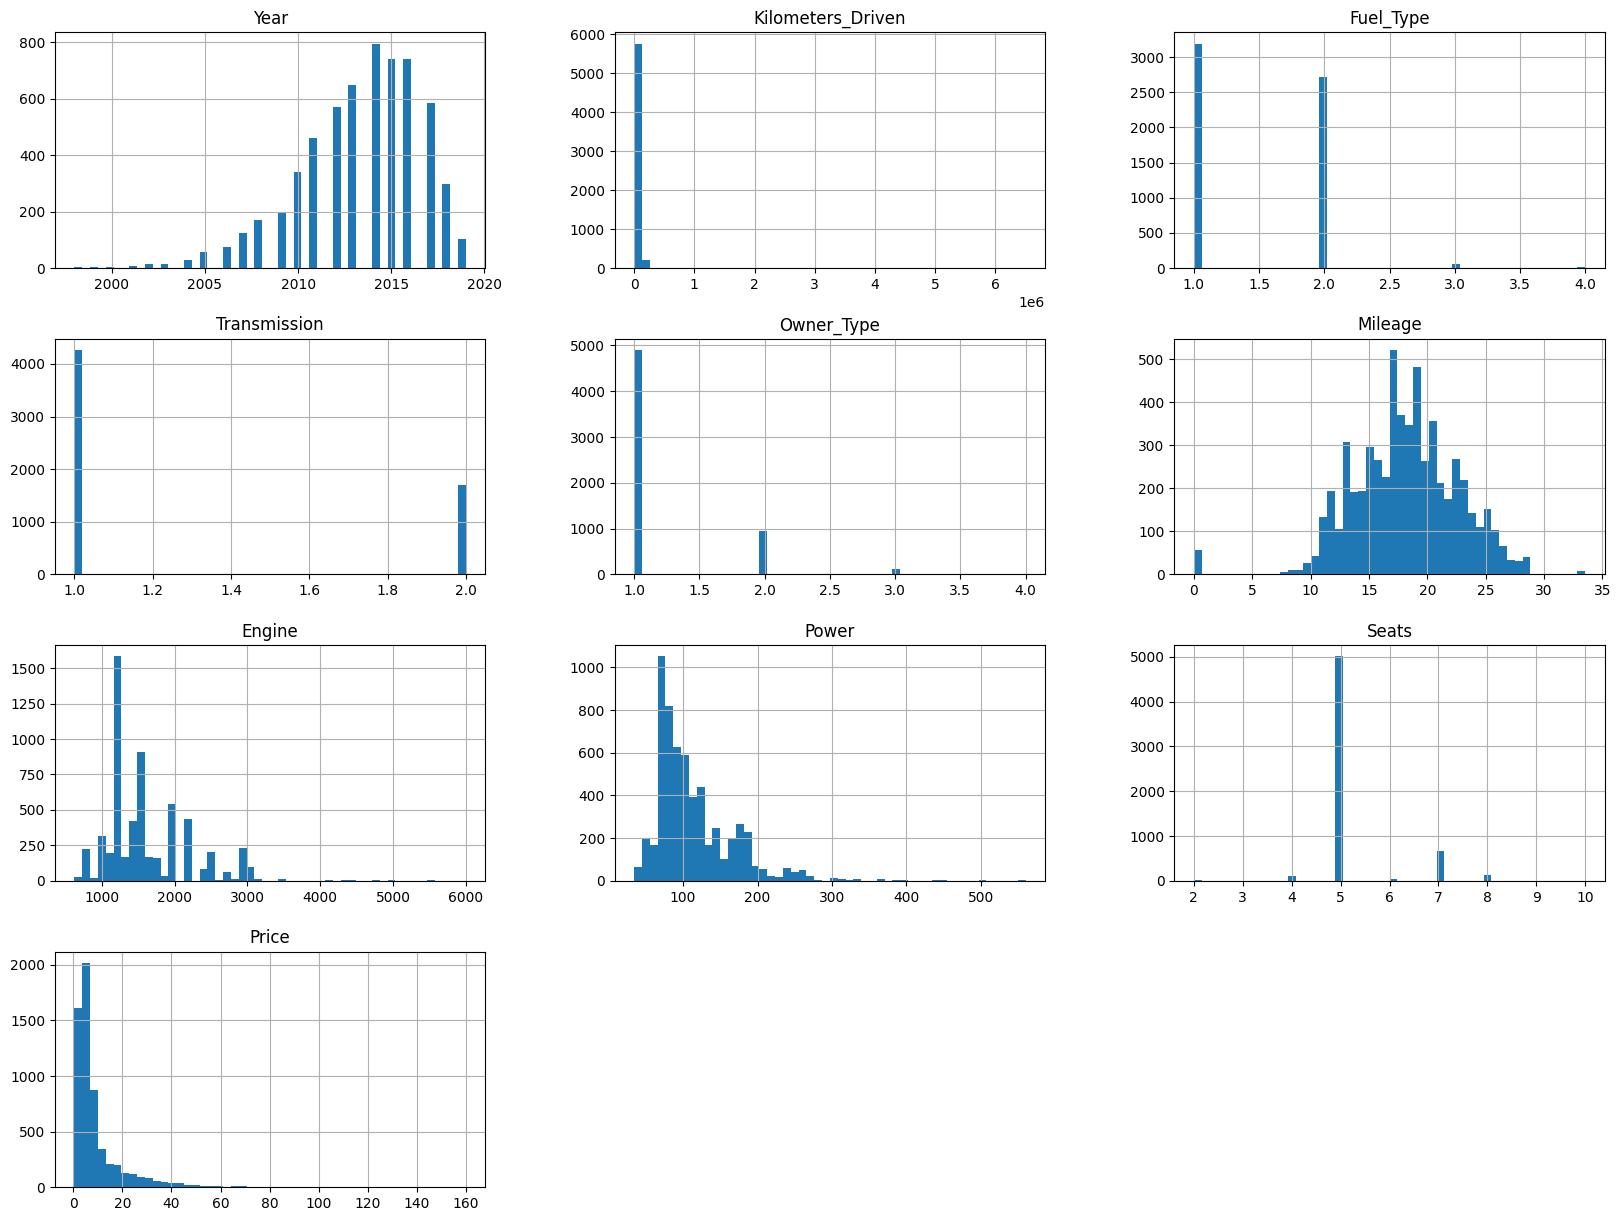

In [47]:
df1.hist(bins = 50 , figsize=(20,15))

In [48]:
df1.describe()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5974.00000,5.974000e+03,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000
mean,2013.38701,5.866321e+04,1.477904,1.285906,1.200703,18.180693,1621.342986,113.477054,5.279712,9.500224
std,3.24746,9.156216e+04,0.527589,0.451882,0.453488,4.521087,600.741506,53.441432,0.806138,11.206134
min,1998.00000,1.710000e+02,1.000000,1.000000,1.000000,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.00000,3.390450e+04,1.000000,1.000000,1.000000,15.215000,1198.000000,77.000000,5.000000,3.500000
50%,2014.00000,5.300000e+04,1.000000,1.000000,1.000000,18.160000,1493.000000,98.600000,5.000000,5.650000
75%,2016.00000,7.300000e+04,2.000000,2.000000,1.000000,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.00000,6.500000e+06,4.000000,2.000000,4.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


In [49]:
df_ruf = df1.drop(["Name" , "Location"], axis=1)

In [50]:
df_ruf.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,3,1,1,26.60,998.0,58.16,5.0,1.75
1,2015,41000,1,1,1,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,2,1,1,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,1,1,1,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,1,2,2,15.20,1968.0,140.80,5.0,17.74


In [51]:
cor_matx = df_ruf.corr()

In [52]:
cor_matx

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.172622,-0.116372,0.095946,-0.394144,0.314376,-0.052382,0.008011,0.011915,0.305874
Kilometers_Driven,-0.172622,1.000000,-0.099913,-0.026068,0.084856,-0.064803,0.090570,0.034225,0.084196,-0.011356
Fuel_Type,-0.116372,-0.099913,1.000000,-0.146249,0.041980,-0.072748,-0.427060,-0.295296,-0.299396,-0.315620
Transmission,0.095946,-0.026068,-0.146249,1.000000,-0.008824,-0.342209,0.500755,0.639633,-0.073879,0.586025
Owner_Type,-0.394144,0.084856,0.041980,-0.008824,1.000000,-0.161533,0.052117,0.027813,0.013567,-0.097004
Mileage,0.314376,-0.064803,-0.072748,-0.342209,-0.161533,1.000000,-0.598382,-0.520282,-0.311268,-0.313752
Engine,-0.052382,0.090570,-0.427060,0.500755,0.052117,-0.598382,1.000000,0.858231,0.397948,0.659195
Power,0.008011,0.034225,-0.295296,0.639633,0.027813,-0.520282,0.858231,1.000000,0.099345,0.766871
Seats,0.011915,0.084196,-0.299396,-0.073879,0.013567,-0.311268,0.397948,0.099345,1.000000,0.053283
Price,0.305874,-0.011356,-0.315620,0.586025,-0.097004,-0.313752,0.659195,0.766871,0.053283,1.000000


In [53]:
from pandas.plotting import scatter_matrix

In [54]:
attributs  = ['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','Price']

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Kilometers_Driven', ylabel='Year'>,
        <Axes: xlabel='Fuel_Type', ylabel='Year'>,
        <Axes: xlabel='Transmission', ylabel='Year'>,
        <Axes: xlabel='Owner_Type', ylabel='Year'>,
        <Axes: xlabel='Mileage', ylabel='Year'>,
        <Axes: xlabel='Engine', ylabel='Year'>,
        <Axes: xlabel='Power', ylabel='Year'>,
        <Axes: xlabel='Seats', ylabel='Year'>,
        <Axes: xlabel='Price', ylabel='Year'>],
       [<Axes: xlabel='Year', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Kilometers_Driven', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Fuel_Type', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Transmission', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Owner_Type', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Mileage', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Engine', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Power', ylabel='Kilometers

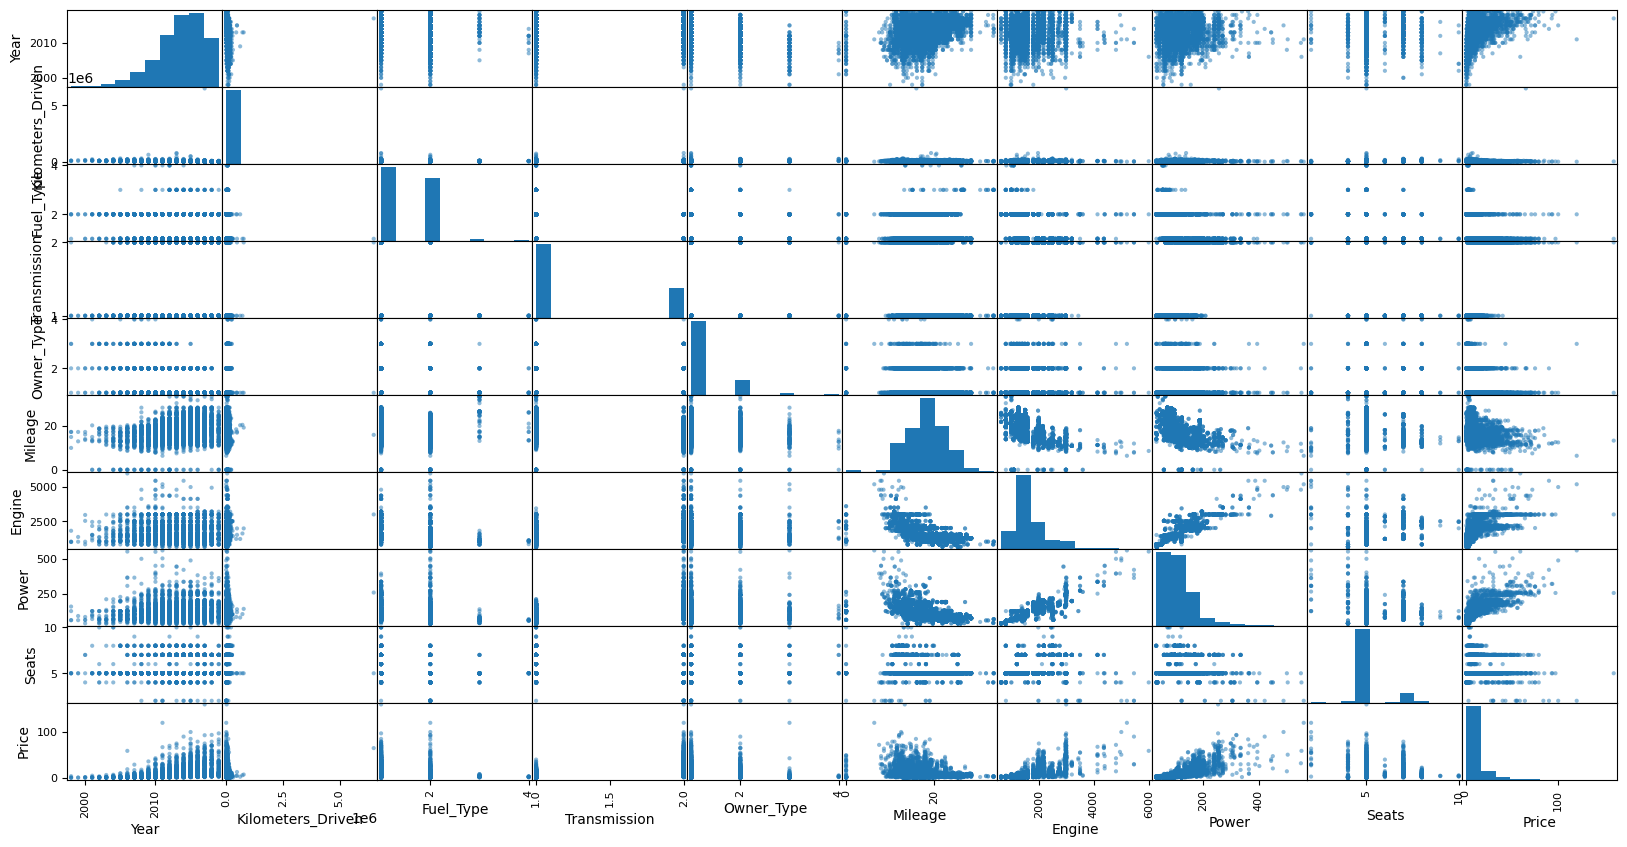

In [55]:
scatter_matrix(df1[attributs] ,figsize=(20,10))

df1.plot(kind = 'scatter', x= 'Price', y ='Year')

<Axes: xlabel='Price', ylabel='Mileage'>

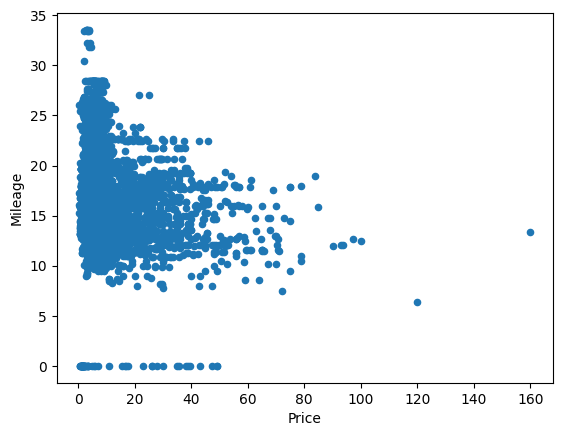

In [56]:
df1.plot(kind = 'scatter', x= 'Price', y ='Mileage')

<Axes: xlabel='Price', ylabel='Engine'>

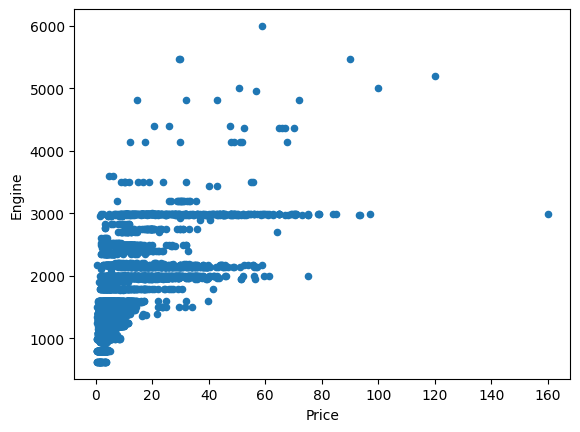

In [57]:
df1.plot(kind = 'scatter', x= 'Price', y ='Engine')

<Axes: xlabel='Price', ylabel='Power'>

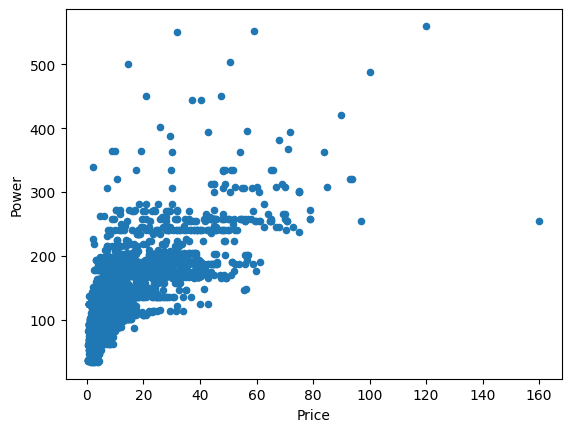

In [58]:
df1.plot(kind = 'scatter', x= 'Price', y ='Power')

<Axes: xlabel='Mileage', ylabel='Engine'>

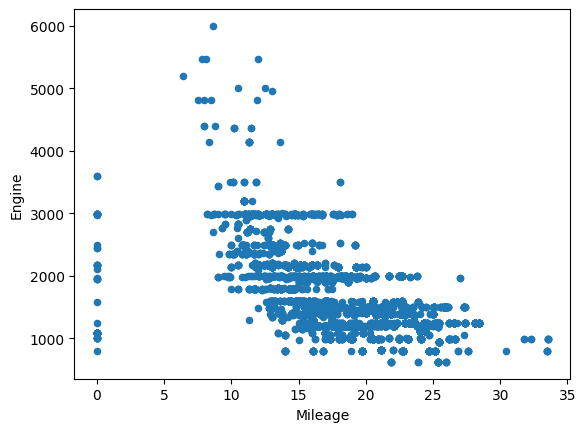

In [59]:
df1.plot(kind = 'scatter', x= 'Mileage', y ='Engine')

<Axes: xlabel='Engine', ylabel='Power'>

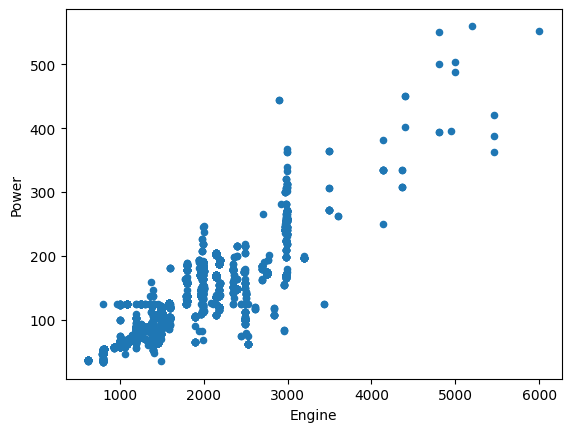

In [60]:
df1.plot(kind = 'scatter', x= 'Engine', y ='Power')

<Axes: xlabel='Power', ylabel='Mileage'>

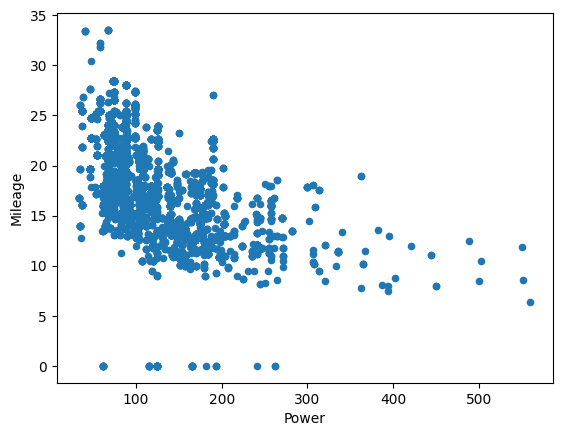

In [61]:
df1.plot(kind = 'scatter', x= 'Power', y ='Mileage')

<Axes: xlabel='Price', ylabel='Price'>

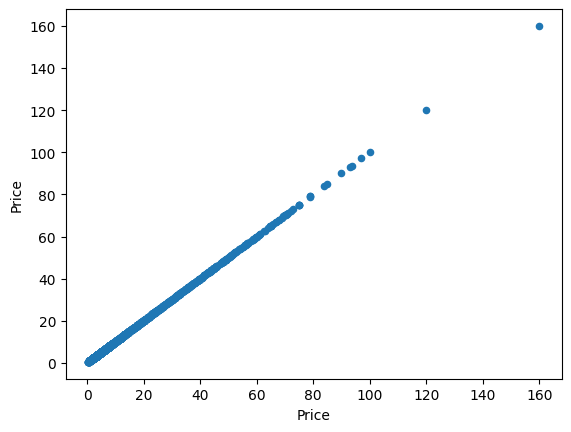

In [62]:
df1.plot(kind = 'scatter', x= 'Price', y ='Price')

Removing Outliers from Daatasets 

In [63]:
print("Highest value" , df1['Price'].mean()+3*df1['Price'].std())

Highest value 43.11862715248581


In [64]:
df1["Price"].describe()

count    5974.000000
mean        9.500224
std        11.206134
min         0.440000
25%         3.500000
50%         5.650000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

In [65]:
print("Highest value" , df1['Price'].mean()-1*df1['Price'].std())

Highest value -1.7059099770645147


In [66]:
 df4= df1[(df1["Price"]>100.0)|(df1["Price"]<0.00)]

In [67]:
df4.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4079,Land Rover,Hyderabad,2017,25000,1,2,1,13.33,2993.0,255.0,5.0,160.0
5781,Lamborghini Gallardo,Delhi,2011,6500,2,2,3,6.40,5204.0,560.0,2.0,120.0


In [68]:
df2 =df1[(df['Mileage']<5)]

In [69]:
df2.shape

(56, 12)

In [70]:
df3 = df1.drop(df2.index)

In [71]:
df3['Mileage'].describe()

count    5918.000000
mean       18.352731
std         4.180405
min         6.400000
25%        15.300000
50%        18.200000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

In [72]:
df1['Mileage'].describe()

count    5974.000000
mean       18.180693
std         4.521087
min         0.000000
25%        15.215000
50%        18.160000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

In [73]:
df3 = df3.drop(df4.index)

In [74]:
df4.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4079,Land Rover,Hyderabad,2017,25000,1,2,1,13.33,2993.0,255.0,5.0,160.0
5781,Lamborghini Gallardo,Delhi,2011,6500,2,2,3,6.40,5204.0,560.0,2.0,120.0


In [75]:
df3.shape

(5916, 12)

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Kilometers_Driven', ylabel='Year'>,
        <Axes: xlabel='Fuel_Type', ylabel='Year'>,
        <Axes: xlabel='Transmission', ylabel='Year'>,
        <Axes: xlabel='Owner_Type', ylabel='Year'>,
        <Axes: xlabel='Mileage', ylabel='Year'>,
        <Axes: xlabel='Engine', ylabel='Year'>,
        <Axes: xlabel='Power', ylabel='Year'>,
        <Axes: xlabel='Seats', ylabel='Year'>,
        <Axes: xlabel='Price', ylabel='Year'>],
       [<Axes: xlabel='Year', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Kilometers_Driven', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Fuel_Type', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Transmission', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Owner_Type', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Mileage', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Engine', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Power', ylabel='Kilometers

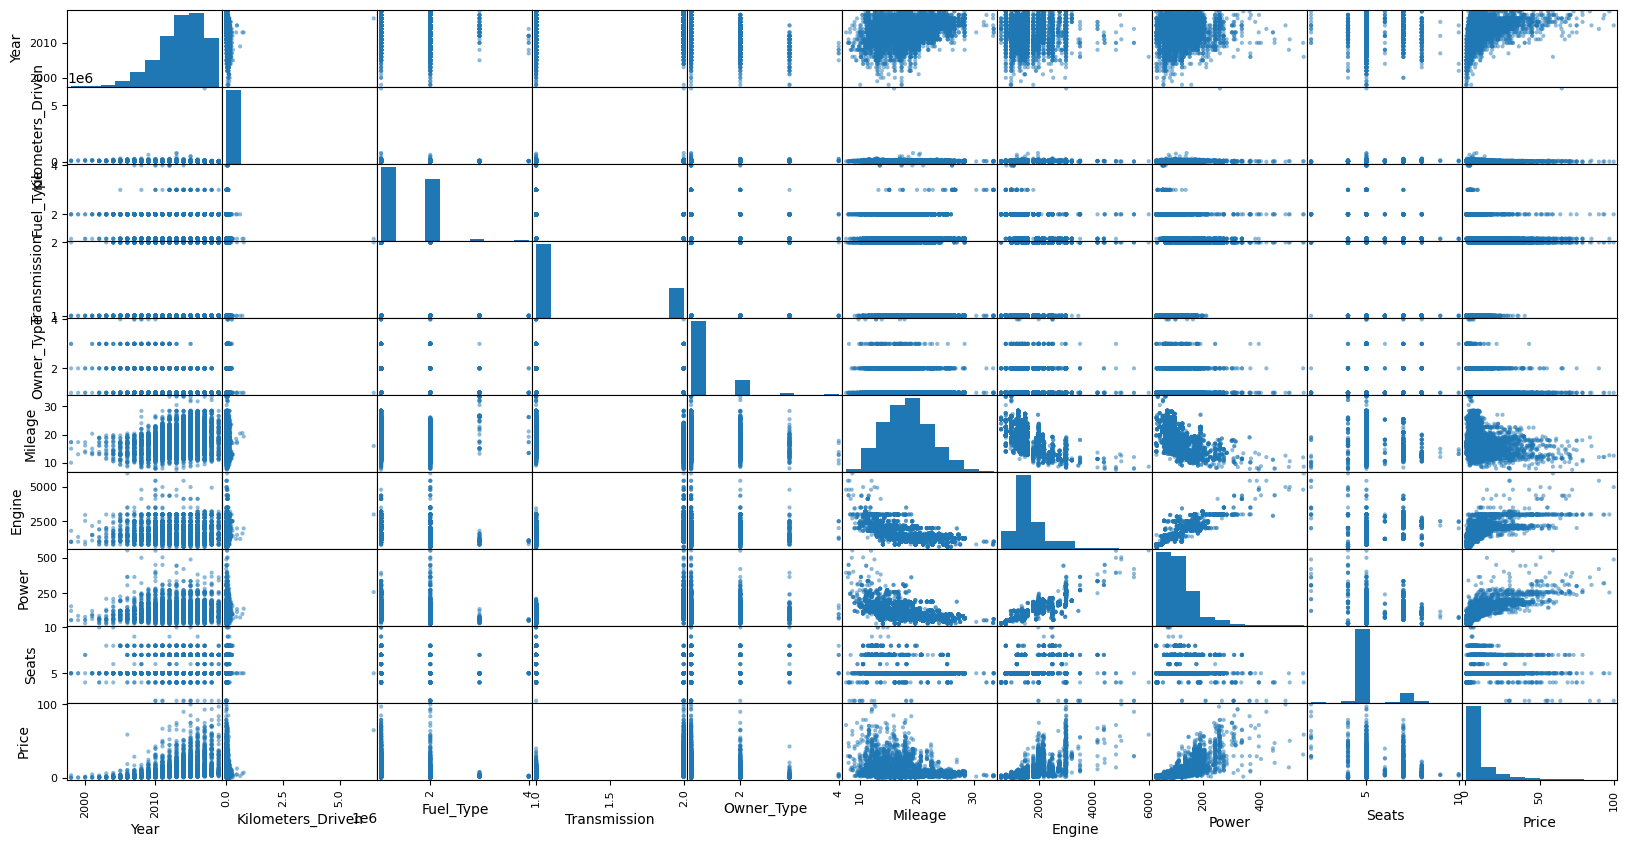

In [76]:
# scatter_matrix(df3[attributs] ,figsize=(20,10))

<Axes: xlabel='Power', ylabel='Mileage'>

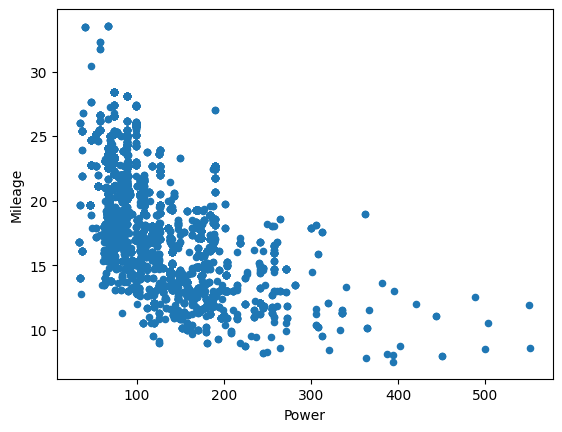

In [77]:
df3.plot(kind = 'scatter', x= 'Power', y ='Mileage')

In [78]:
df3.describe()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5916.000000,5.916000e+03,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000
mean,2013.424442,5.853260e+04,1.477011,1.284483,1.197938,18.355600,1619.161765,113.188453,5.281778,9.433147
std,3.208169,9.187841e+04,0.527818,0.451206,0.449140,4.177711,596.164698,53.151686,0.804181,10.892674
min,1998.000000,1.710000e+02,1.000000,1.000000,1.000000,7.500000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.388950e+04,1.000000,1.000000,1.000000,15.300000,1198.000000,76.800000,5.000000,3.500000
50%,2014.000000,5.300000e+04,1.000000,1.000000,1.000000,18.200000,1493.000000,98.600000,5.000000,5.650000
75%,2016.000000,7.268325e+04,2.000000,2.000000,1.000000,21.100000,1971.250000,138.100000,5.000000,9.900000
max,2019.000000,6.500000e+06,4.000000,2.000000,4.000000,33.540000,5998.000000,552.000000,10.000000,100.000000


In [79]:
df2 = df3.copy()

In [80]:
df2.describe()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5916.000000,5.916000e+03,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000
mean,2013.424442,5.853260e+04,1.477011,1.284483,1.197938,18.355600,1619.161765,113.188453,5.281778,9.433147
std,3.208169,9.187841e+04,0.527818,0.451206,0.449140,4.177711,596.164698,53.151686,0.804181,10.892674
min,1998.000000,1.710000e+02,1.000000,1.000000,1.000000,7.500000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.388950e+04,1.000000,1.000000,1.000000,15.300000,1198.000000,76.800000,5.000000,3.500000
50%,2014.000000,5.300000e+04,1.000000,1.000000,1.000000,18.200000,1493.000000,98.600000,5.000000,5.650000
75%,2016.000000,7.268325e+04,2.000000,2.000000,1.000000,21.100000,1971.250000,138.100000,5.000000,9.900000
max,2019.000000,6.500000e+06,4.000000,2.000000,4.000000,33.540000,5998.000000,552.000000,10.000000,100.000000
